# Term Deposit Marketing

**[0. Business Understanding](#business)**

**[1. Data Understanding](#understanding)**
- [1.1. General Information](#information)

**[2. Data Preprocessing](#preprocessing)**
- [2.1. Missing Values (Filling Missing Values)](#missing)
- [2.2. Feature Engineering (One Hot Encoding)](#feature)
- [2.3. Feature Scaling (Normalization)](#scaling)
- [2.4. Upsampling](#upsampling)

**[3. Modeling (Linear, Non-Linear Modeling and Tuning)](#modeling)**
- [3.1. Base Models](#base)
- [3.2. Comparison of Final Models](#compare)

**[4. Reporting](#reporting)**

**[5. Resources](#resources)**

<a id= "business"></a>
# 0. Business Understanding

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

#### Goal

- Predict if the customer will subscribe (yes/no) to a term deposit (variable y)

#### Success Metric(s):

- Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.

#### Bonus(es):

- We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

- What makes the customers buy? Tell us which feature we should be focusing more on.

#### Features
**1. Dependent Variable:**

- **y :** has the client subscribed to a term deposit? (categorical: 'no','yes')


**2. Independent Variables:**

- **age:** age of customer (numeric)

- **job:** type of job (categorical: 'admin','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

- **marital:** marital status (categorical: 'divorced','married','single')

- **education:** (categorical: 'primary', 'secondary', 'tertiary', 'unknown')

- **default:** has credit in default? (categorical: 'no','yes')

- **balance:** average yearly balance, in euros (numeric) 

- **housing:** has a housing loan? (categorical: 'no','yes')

- **loan:** has personal loan? (categorical: 'no','yes')

- **contact:** contact communication type (categorical: 'cellular','telephone','unknown')

- **day:** last contact day of the month (numeric)
    
- **month:** last contact month of year (categorical: 'jan','feb','mar',.. , 'nov','dec')

- **duration:** last contact duration, in seconds (numeric)

- **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)

<a id="understanding"></a>
# 1. Data Understanding (EDA)

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from IPython.display import Image


import warnings
warnings.simplefilter(action = "ignore") 

pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [124]:
data = pd.read_csv("term-deposit-marketing-2020.csv")
df = data.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


<a id= "information"></a>
## 1.1. General Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
age          40000 non-null int64
job          40000 non-null object
marital      40000 non-null object
education    40000 non-null object
default      40000 non-null object
balance      40000 non-null int64
housing      40000 non-null object
loan         40000 non-null object
contact      40000 non-null object
day          40000 non-null int64
month        40000 non-null object
duration     40000 non-null int64
campaign     40000 non-null int64
y            40000 non-null object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [4]:
df.shape

(40000, 14)

In [5]:
df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
age,40000,41,10,19,24,27,29,33,39,48,55,58,60,95
balance,40000,1274,2904,-8019,-672,-209,0,54,407,1319,3379,5517,12857,102127
day,40000,16,8,1,2,3,5,8,17,21,28,30,31,31
duration,40000,255,259,0,11,33,56,100,175,313,547,754,1273,4918
campaign,40000,3,3,1,1,1,1,1,2,3,6,8,17,63


- **Ortalama Age** : 41 yaş (Minimum : 19 yaş ve Maksimum: 95)
- **Ortalama Balance** : 1274 buna bağlı olarak standart sapma daha yüksek. Bu nedenle bakiyenin veri kümesinde yoğun bir şekilde dağıldığını anlayabiliriz.


### Continuous Variables

In [6]:
print("Continuous Variables","\n")
continous_vars = df.describe().columns
print(continous_vars)

Continuous Variables 

Index(['age', 'balance', 'day', 'duration', 'campaign'], dtype='object')


Continuous Variables Visualization 



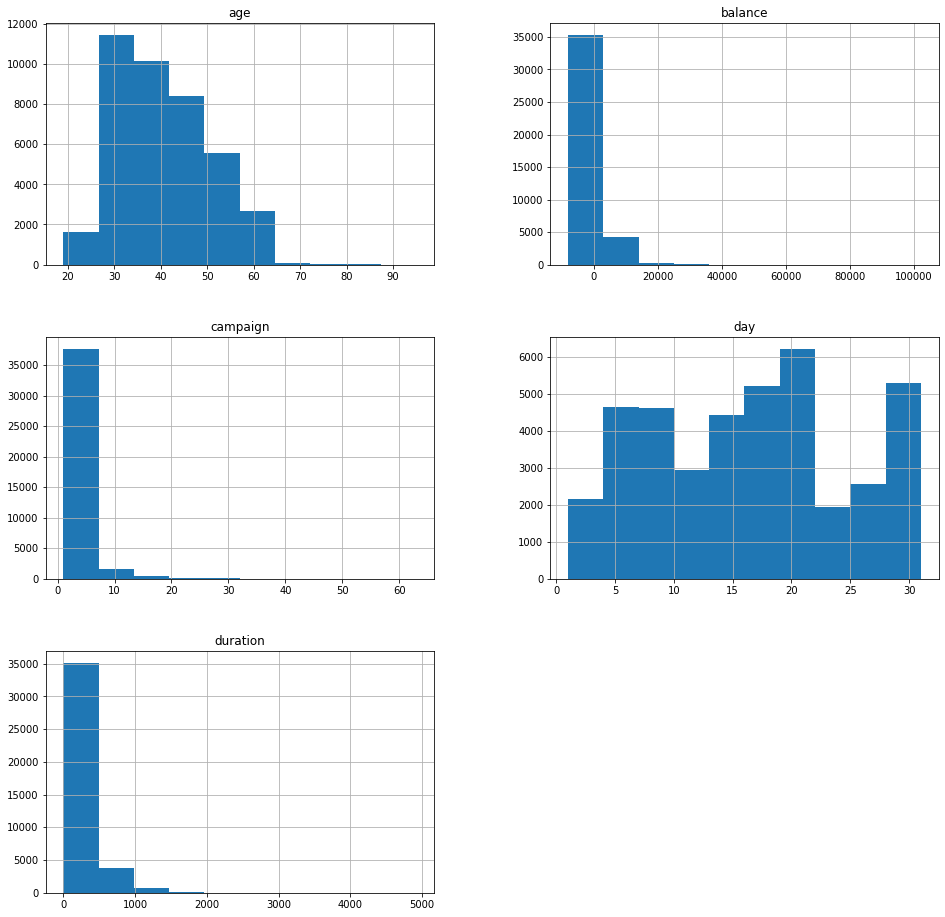

In [7]:
print("Continuous Variables Visualization","\n")
df.hist(column=continous_vars,figsize=(16,16))
plt.show()

### Categorical Variables

In [8]:
print("Categorical Variables","\n")
categorical_vars = df.describe(include=[object]).columns
print(categorical_vars)

Categorical Variables 

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'y'],
      dtype='object')


Categorical Variables Visualization 



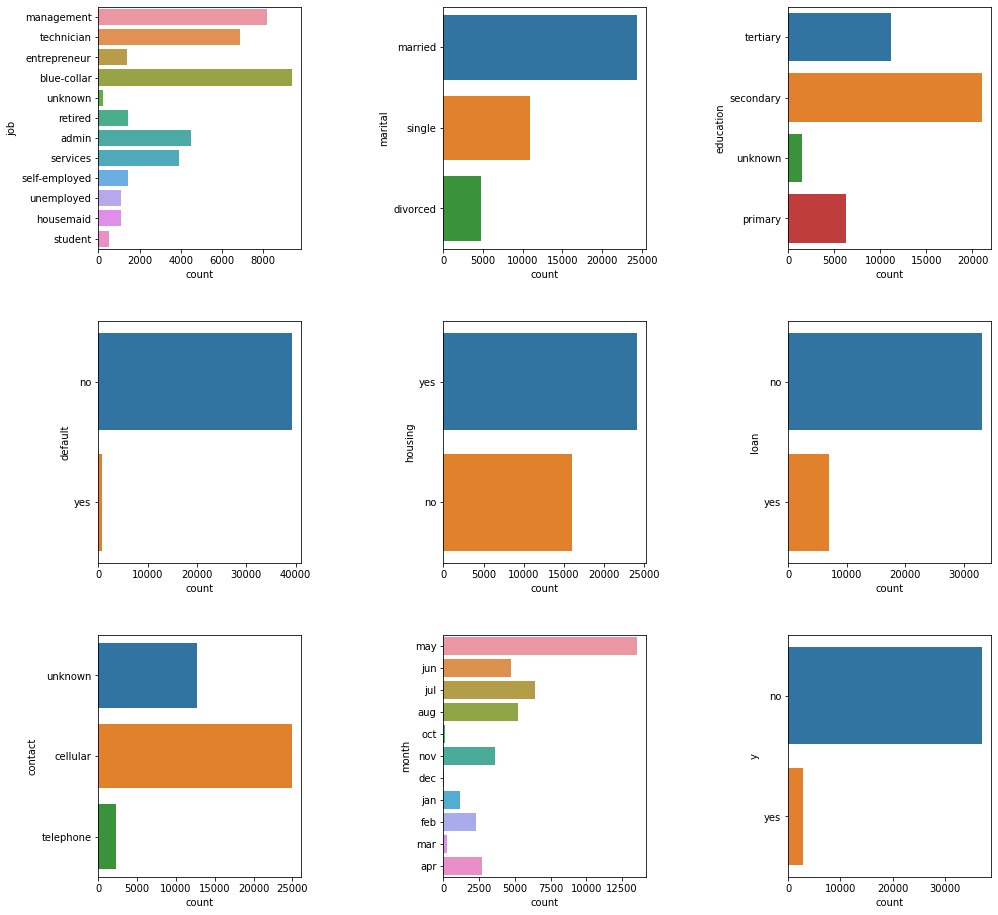

In [9]:
print("Categorical Variables Visualization","\n")
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)
for i, ax in enumerate(axes.ravel()):
    if i > 10:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=df, ax=ax)
plt.show()

In [10]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0) 

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        11
y             2
dtype: int64

### Correlations

Correlation Matrix 



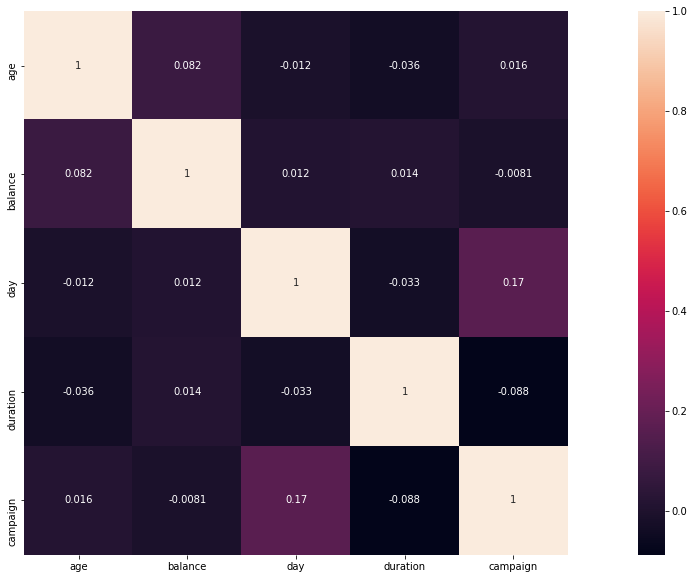

In [11]:
#Heat map
print("Correlation Matrix","\n")    
correlation=df.corr(method="pearson")
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
plt.show()

#### Veri Seti Hakkında Teknik Değerlendirme

- Veri seti 40000 örnekten oluşmaktadır.
- Eksik veri gözlemlenmemektedir. Girilen tüm veriler boş olmayan değerlerdir, yani her sütun için bir değerimiz vardır.
- Sınıflandırma hedefi, müşterinin vadeli depozitoya (değişken y) abone olup olmayacağını (yes / no) tahmin etmektir.
- "job", "marital", "education", "default", "housing", "loan", "contact", "month" ve "y" olmak üzere 9 adet kategorik değişken vardır. Bu kategorik değişkenlerin sayısallaştırılması gerekir, olduğu gibi modele sokulamamaktadır. Bir dönüştürme yapılmalıdır(1-0). Bu kategorik değişkenler eğer 2 sınıflı ise **Label Encoding**, 2'den fazla ise **One-Hot Encoding** (2 dahilde olabilir) ile çevrilebilir. Veri setinin kategorik değişken sınıfları 2'den fazla olduğu için One-Hot Encoding yöntemiyle sayısal değere dönüştürülmesi gerekir.

### Class Distribution of the Target Variable

In [12]:
df["y"].value_counts()*100/len(df)

no    93
yes    7
Name: y, dtype: float64

In [13]:
df["y"].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

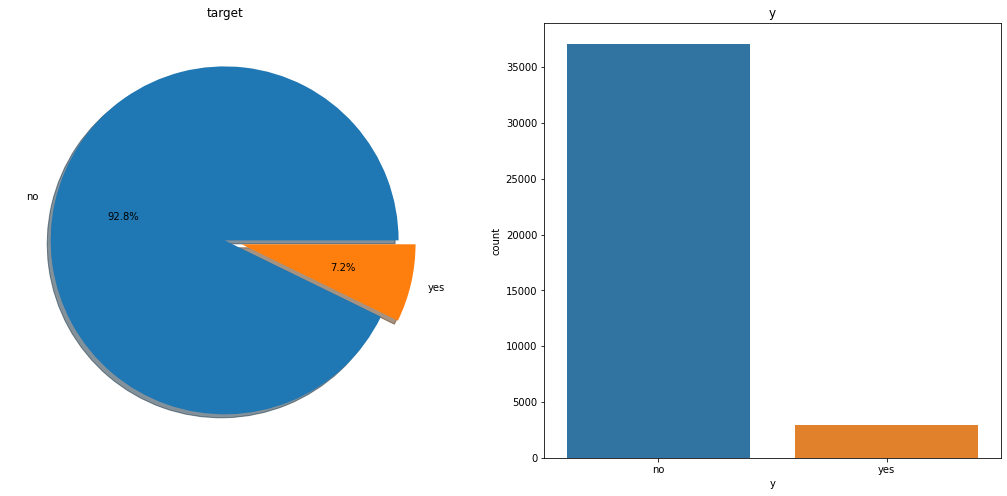

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('y',data=df,ax=ax[1])
ax[1].set_title('y')
plt.show()

Dengesiz sınıf problemi var. Veri seti "no" sınıfı ağırlığındadır. Bunun için Upsampling işlemi gerekmektedir. Çoğunluk sınıfındaki her gözlem için, azınlık sınıfından rastgele bir şekilde değiştirilmiş bir gözlem seçeriz. Sonuç, azınlık ve çoğunluk sınıflarından aynı sayıda gözlemdir.

<a id="preprocessing"></a>
# 2. Data Preprocessing

<a id= "missing"></a>
## 2.1. Missing Values (Filling Missing Values)

In [15]:
df.isnull().sum().sum()

0

In [16]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

#### Dealing with Duplicate values:

In [18]:
df_dup = df[df.duplicated(keep = 'last')]
df_dup

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y


<a id= "feature"></a>
## 2.2. Feature Engineering (One Hot Encoding)

### One-Hot Encoding

In [19]:
columns = df.select_dtypes(include=[object]).columns
df = pd.get_dummies(df, columns, drop_first=True)
df.head()

,age,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y_yes
0,58,2143,5,261,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


<a id= "scaling"></a>
## 2.3. Feature Scaling (Normalization)

In [19]:
min_max_scaler=preprocessing.MinMaxScaler()
data_scaled=pd.DataFrame(min_max_scaler.fit_transform(df),columns=df.columns)

In [20]:
y = data_scaled.y_yes
data_scaled = data_scaled.drop(['y_yes'], axis = 1)

### Train-Test Data Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.2, random_state=42)

<a id= "upsampling"></a>
## 2.4. Upsampling

In [22]:
def upSample(X_train, y_train):
    df_all = pd.concat((X_train, pd.DataFrame({'value': y_train}, index=y_train.index)), axis=1)
    
    df_majority = df_all [df_all.value==0]
    df_minority = df_all[df_all.value==1]
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=df_majority.shape[0],    # to match majority class
                                     random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0)
    y_upsampled = df_upsampled.value
    X_upsampled = df_upsampled.drop('value', axis=1)

    return X_upsampled, y_upsampled

#### Veri Ön İşlemede yapılanlar:
- Eksik değerler kontrol edildi. Eksik değere rastlanmadığı teyit edildi.
- Veri setinde yinelenen değer kontrolü yapıldı, yinelenen değerlere rastlanmadı. Rastlansaydı kopyaları kaldırarak adımlara devam etmeliydi.
- Kategorik değişkenler sayısallaştırıldı. One Hot Encoding ile sütunları oluşturmak için get_dummies tarafından sağlanan işlev kullanıldı. Makine öğrenimi için toplamda 37 özellik yaratıldı. (5'i sayısal özellik, 32'i kategorik) özellik
- Değişkenler farklı boyutlarda olduğunda makine öğrenimi modellerinde sorunlar olabilir. Bununla mücadele etmek için veriler MinMaxScaler ile ölçeklendirildi. 
- Veri seti modelimizin görünmeyen veriler üzerinde ne kadar iyi çalışacağını ölçebilmek için eğitim ve test verisine bölündü. (80-20)
- Dengesiz sınıflandırmanın önüne geçmek adına Upsampling yöntemi kullanıldı. Sayıca az olan gruptaki veriler sayıca fazla olan gruptaki veri sayısı kadar artırıldı. Bu işlem için sklearn.utils kütüphanesinden resample fonksiyonu kullanıldı ve Resample fonksiyonu ile az sayıdaki hesap açmama kararı veren gözlemler klonlarak çoğaltıldı.

<a id= "modeling"></a>
# 3. Modeling (Linear, Non-Linear Modeling and Tuning)

<a id= "base"></a>
## 3.1. Base Models

### 1. Logistic Regression

In [23]:
X_train,y_train=upSample(X_train, y_train)
lr = LogisticRegression(random_state = 42)
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)
print("Logistic Regression","\n")
print("Classification Report","\n")
print(classification_report(y_test, prediction))

Logistic Regression 

Classification Report 

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93      7424
         1.0       0.35      0.88      0.50       576

    accuracy                           0.87      8000
   macro avg       0.67      0.87      0.71      8000
weighted avg       0.94      0.87      0.90      8000



#### Confusion Matrix

Confusion Matrix 



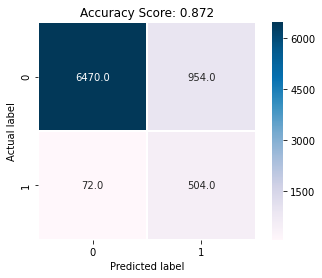

In [24]:
print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, prediction),3) 
cm1 = cm(y_test, prediction)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

#### Feature Selection

In [25]:
rfe=RFE(lr,10)
rfe=rfe.fit(X_train,y_train)
print("Feature Selection","\n")
print(X_train[X_train.columns[rfe.ranking_==1].values].columns,"\n")

Feature Selection 

Index(['balance', 'duration', 'campaign', 'contact_unknown', 'month_aug',
       'month_dec', 'month_jan', 'month_jul', 'month_mar', 'month_oct'],
      dtype='object') 



#### Cross Validation

In [26]:
accuracies = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 5)
print("Accuracy (mean): %",accuracies.mean()*100)
print("std: %",accuracies.std()*100)

Accuracy (mean): % 86.4605795148248
std: % 0.21962383406647165


In [27]:
scores = cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=5,)
print ("MAE (mean): %" , scores.mean())

MAE (mean): % -0.135394204851752


#### Errors

In [28]:
mae = mean_absolute_error(lr.predict(X_test), y_test)
mse = mean_squared_error(lr.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.13
Root Mean Squared Error (RMSE): 0.36


#### Cohen - Matthew Score

In [29]:
print("Cohen Score",cohen_kappa_score(y_test, prediction))
print("Matthew Score",matthews_corrcoef(y_test, prediction))

Cohen Score 0.4375148022420462
Matthew Score 0.499832797345127


#### Logistic Regression Yorumu:
- Lojistik regresyon, bir sonucu belirleyen bir veya daha fazla bağımsız değişken bulunan bir veri kümesini analiz etmek için kullanılan istatistiksel bir yöntemdir.
- Doğruluk ve Confusion Matrix: Lojistik regresyon modeli uygulandığında **Doğruluk Skoru %87.2** olarak bulundu. Veri setinin dengesiz dağılımı dolayısıyla doğruluk skoru yanlış yorumlara sebep olabilir. Bunun yerine Precision, Recall ve F1-skorlarına bakıldığında bununda yetersiz olduğu görüldü.

- Model Hata Oranları :
 - Mean Absolute Error (MAE): 0.13
 - Mean Squared Error (MSE): 0.13
 - Root Mean Squared Error (RMSE): 0.36
- Model Değerlendirme:
 - Cohen Kappa Score: İki değerleyici arasındaki karşılaştırmalı uyuşmanın güvenirliğini ölçen bir istatistik yöntemidir. Lojistik Regresyon modelinde y_test ve y_prediction değerleri için **Cohen Kappa Katsayısı: 0.437** olarak hesaplanıldı. 0.41- 0.60 arasında olduğu için gerçek değerler ile sınıflandırıcının verdiği kararların arasında **ekseriyetle uyuşma** olduğu görülmektedir.
 - Matthews Korelasyon Katsayısı: İkili sınıflandırma modelleri için doğruluk (Accuracy) oranı değerine göre MCC ölçütü daha güvenilir ve doğru sonuçlar vermektedir. MMC, -1 ile +1 arasında bir değer döndürür. +1 katsayısı mükemmel bir tahmini temsil eder, 0 rastgele tahminden daha iyi değildir ve −1, tahmin ve gözlem arasındaki toplam anlaşmazlığı gösterir. Modelde y_test ve y_prediction değerleri için **Matthews Korelasyon Katsayısı: 0.499** olarak hesaplanıldı.

### 2. K Nearest Neighbors

In [32]:
classifier = KNeighborsClassifier(n_neighbors=100,weights="distance")  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  

print("KNN Algorithm")
print("Classification Report")
print(classification_report(y_test, y_pred))

KNN Algorithm
Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88      7424
         1.0       0.21      0.65      0.32       576

    accuracy                           0.80      8000
   macro avg       0.59      0.73      0.60      8000
weighted avg       0.91      0.80      0.84      8000



Confusion Matrix 



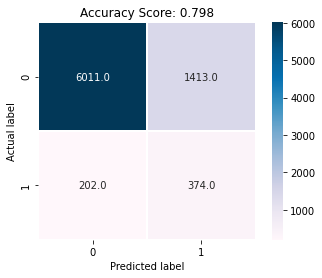

In [33]:
print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred),3) 
cm1 = cm(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [34]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy (mean): %",accuracies.mean()*100)
print("std: %",accuracies.std()*100)

scores = cross_val_score(classifier, X_train, y_train, scoring='neg_mean_absolute_error', cv=5,)
print ("MAE (mean): %" , scores.mean())
print("\n")

Accuracy (mean): % 90.02863881401618
std: % 0.29485463678702595
MAE (mean): % -0.09971361185983828




In [35]:
mae = mean_absolute_error(classifier.predict(X_test), y_test)
mse = mean_squared_error(classifier.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)
print("\n")

Mean Absolute Error (MAE): 0.20
Mean Squared Error (MSE): 0.20
Root Mean Squared Error (RMSE): 0.45




In [36]:
print("Cohen Score",cohen_kappa_score(y_test, y_pred))
print("Matthew Score",matthews_corrcoef(y_test, y_pred))

Cohen Score 0.2330239467495413
Matthew Score 0.2848446656902299


#### K Nearest Neighbors Yorumu:
- Knn algoritması (sınıf niteliği belli olan) elemanların meydana getirdiği uzaya yeni bir örnek (sınıf niteliği belli olmayan) eklendiğinde bu örneğin kendisine en yakın olan sınıfa dahil edilmesi gerektiğini kararlaştıran bir algoritmadır. Kendisine en yakın olan sınıfı belirlemek için bir k değişkeni kullanmaktadır.
- Doğruluk ve Confusion Matrix: En yakın komşu modeli uygulandığında **Doğruluk Skoru %79.8** olarak bulundu. Veri setinin dengesiz dağılımı dolayısıyla doğruluk skoru yanlış yorumlara sebep olabilir. Bunun yerine Precision, Recall ve F1-skorlarına bakıldığında bununda yetersiz olduğu görüldü.
- Cross Validation: Bir sonraki aşamada modelin farklı veri setlerindeki performansını görmek üzere Cross Validation metodu uygulanmış ve Cross Validation ile 5 iterasyonda elde edilen sonuçlar aşağıda belirtilmiştir.
 - Ortalama Doğruluk Skoru : 90.02
 - Doğruluk Skoru Standart Sapması : 0.29
 - Ortalama Mean Square Error : 0.09
- Model Hata Oranları :
 - Mean Absolute Error (MAE): 0.20
 - Mean Squared Error (MSE): 0.20
 - Root Mean Squared Error (RMSE): 0.45
- Model Değerlendirme:
 - Cohen Kappa Score: İki değerleyici arasındaki karşılaştırmalı uyuşmanın güvenirliğini ölçen bir istatistik yöntemidir. Lojistik Regresyon modelinde y_test ve y_prediction değerleri için **Cohen Kappa Katsayısı: 0.233** olarak hesaplanıldı. 0.21 — 0.40 arasında olduğu için gerçek değerler ile sınıflandırıcının verdiği kararların arasında **orta derecede uyuşma** olduğu görülmektedir.
 - Matthews Korelasyon Katsayısı: İkili sınıflandırma modelleri için doğruluk (Accuracy) oranı değerine göre MCC ölçütü daha güvenilir ve doğru sonuçlar vermektedir. MMC, -1 ile +1 arasında bir değer döndürür. +1 katsayısı mükemmel bir tahmini temsil eder, 0 rastgele tahminden daha iyi değildir ve −1, tahmin ve gözlem arasındaki toplam anlaşmazlığı gösterir. Modelde y_test ve y_prediction değerleri için **Matthews Korelasyon Katsayısı: 0.284** olarak hesaplanıldı. Sınıflandırıcının rasgele bir tahmin sınıflandırıcısına çok yakın olduğu anlamına gelir.

### 3. Random Forest

In [37]:
rf = RandomForestClassifier(n_estimators=10 ,n_jobs=-1,
                            random_state=42, 
                            max_depth= 5
                           # class_weight="balanced",
                            #max_features=10)
                            )

rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
print("Random Forest Algorithm","\n")
print("Classification Report","\n")
print(classification_report(y_test, rf_predict))

Random Forest Algorithm 

Classification Report 

              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91      7424
         1.0       0.31      0.84      0.45       576

    accuracy                           0.85      8000
   macro avg       0.65      0.85      0.68      8000
weighted avg       0.94      0.85      0.88      8000



Confusion Matrix 



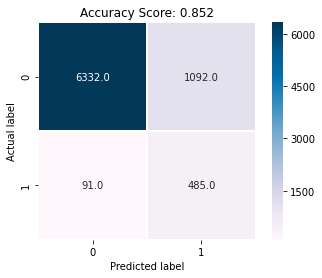

In [38]:
print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, rf_predict),3)
cm1 = cm(y_test, rf_predict)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
            square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [39]:
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 5)
print("Accuracy (mean): %",accuracies.mean()*100)
print("std: %",accuracies.std()*100)

scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=5,)
print ("MAE (mean): %" , scores.mean())
print("\n")

Accuracy (mean): % 84.09029649595688
std: % 0.5309250398922757
MAE (mean): % -0.15909703504043127




In [40]:
mae = mean_absolute_error(rf.predict(X_test), y_test)
mse = mean_squared_error(rf.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)
print("\n")


Mean Absolute Error (MAE): 0.15
Mean Squared Error (MSE): 0.15
Root Mean Squared Error (RMSE): 0.38




In [41]:
print("Cohen Score",cohen_kappa_score(y_test, rf_predict))
print("Matthew Score",matthews_corrcoef(y_test, rf_predict))
print("\n")

Cohen Score 0.3857455584678843
Matthew Score 0.4515255535811044




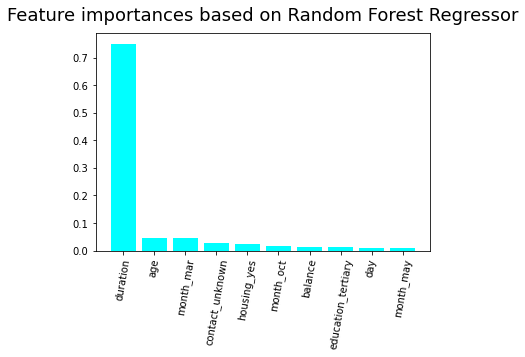

In [43]:
ranking = rf.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = data_scaled.columns
plt.title("Feature importances based on Random Forest Regressor", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="aqua", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

#### Random Forest Yorumu:
- Rastgele Orman, hiperparametre ayarı yapmadan bile, çoğu zaman büyük bir sonuç üreten, esnek, kullanımı kolay bir makine öğrenmesi algoritmasıdır. Aynı zamanda en çok kullanılan algoritmalardan biridir, çünkü hem basitlik hem de sınıflandırma ve regresyon görevleri için kullanılabilir.
- Doğruluk ve Confusion Matrix: En yakın komşu modeli uygulandığında **Doğruluk Skoru %85.2** olarak bulundu. Veri setinin dengesiz dağılımı dolayısıyla doğruluk skoru yanlış yorumlara sebep olabilir. Bunun yerine Precision, Recall ve F1-skorlarına bakıldığında bununda yetersiz olduğu görüldü.
- Cross Validation: Bir sonraki aşamada modelin farklı veri setlerindeki performansını görmek üzere Cross Validation metodu uygulanmış ve Cross Validation ile 5 iterasyonda elde edilen sonuçlar aşağıda belirtilmiştir.
 - Ortalama Doğruluk Skoru : 84.09
 - Doğruluk Skoru Standart Sapması : 0.53
 - Ortalama Mean Square Error : 0.15
- Model Hata Oranları :
 - Mean Absolute Error (MAE): 0.15
 - Mean Squared Error (MSE): 0.15
 - Root Mean Squared Error (RMSE): 0.38
- Model Değerlendirme:
 - Cohen Kappa Score: İki değerleyici arasındaki karşılaştırmalı uyuşmanın güvenirliğini ölçen bir istatistik yöntemidir. Lojistik Regresyon modelinde y_test ve y_prediction değerleri için **Cohen Kappa Katsayısı: 0.385** olarak hesaplanıldı. 0.21 — 0.40 arasında olduğu için gerçek değerler ile sınıflandırıcının verdiği kararların arasında **orta derecede uyuşma** olduğu görülmektedir.
 - Matthews Korelasyon Katsayısı: İkili sınıflandırma modelleri için doğruluk (Accuracy) oranı değerine göre MCC ölçütü daha güvenilir ve doğru sonuçlar vermektedir. MMC, -1 ile +1 arasında bir değer döndürür. +1 katsayısı mükemmel bir tahmini temsil eder, 0 rastgele tahminden daha iyi değildir ve −1, tahmin ve gözlem arasındaki toplam anlaşmazlığı gösterir. Modelde y_test ve y_prediction değerleri için **Matthews Korelasyon Katsayısı: 0.451** olarak hesaplanıldı. 

<a id="compare"></a>
## 3.2. Comparison of Final Models

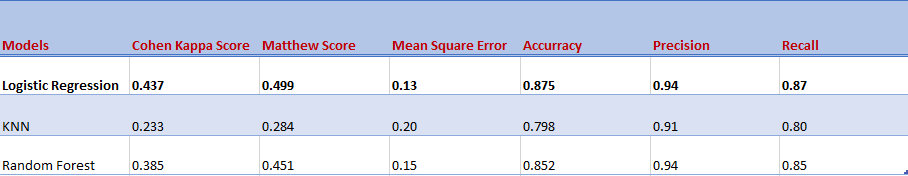

In [7]:
Image(filename = "compare.png", width = 900, height = 600)

<a id="reporting"></a>
# 4. Reporting

- Vadeli hesap açma tahminlemesi için 3 farklı sınıflandırma algoritması üzerinde çalışma yapılmış ve Lojistik Regresyon diğer algoritmalardan daha iyi bir performans gösterdiği tespit edilmiştir.

- Hedef değişkeni dengesiz bir dağılıma sahip olduğu için sadece accuracy değerine değil 3 farklı model performans değeri de incelenmiştir. Lojistik regresyon modeli;
 -  En düşük Ortalama Hata Kare değerine sahiptir ve en düşük hata ile hedef değişkeni tahmin edebilmektedir.
 - En yüksek Cohen Kappa skor değerine sahiptir. Modelin doğruluk değeri ile beklenen doğruluk değerini karşılaştırmaktadır. Bu karşılaştırma sonucunda model tahmin doğruluğunun rastgele olmadığını en yüksek değer ile göstermektedir.
 -  En yüksek Matthew skor değerine sahiptir. Model tahminlerinin niteliği en yüksektir.
 - En yüksek model tahmin doğruluğuna sahiptir.
 - Hedef değişkeni olan vadeli hesap açan kullanıcıları daha yüksek oranda tahmin etmektedir.
 - Hedef değişkeni olan vadeli hesap açacak kullanıcılar olarak etiketlenen kullanıcıların gerçekten açan kullanıcı olarak tahmin edilme oranı daha yüksektir

<a id="resources"></a>
# 5. Resources

1. https://tr.wikipedia.org/wiki/Cohen%27in_kappa_katsay%C4%B1s%C4%B1
2. https://medium.com/swlh/using-machine-learning-to-predict-subscription-to-bank-term-deposits-for-clients-with-python-aec8a4690807
3. https://medium.com/@gulcanogundur/python-ile-s%C4%B1n%C4%B1fland%C4%B1rma-algoritmalar%C4%B1-74797c9c98a9
4. http://www.bioinfopublication.org/files/articles/2_1_1_JMLT.pdf
5. https://ichi.pro/tr/post/53924330618750
6. https://www.linkedin.com/pulse/confusion-matrix-raghavi-adoni/
7. https://en.wikipedia.org/wiki/Matthews_correlation_coefficient